In [1]:
import os
from disentangle.core.tiff_reader import load_tiff, save_tiff

def convert_to_kth_data(fpath):
    """
    In case we have the full prediction tiff file, we need to convert it to kth data format. one prediction per file. 
    """
    '/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk8_F/kth_{KTH_SAMPLE}/pred_disentangle_2404_D21-M3-S0-L8_6_1.tif'
    fname = os.path.basename(fpath)
    fdir = os.path.join(os.path.dirname(fpath), 'kth_{k}')
    new_fpath_schema = os.path.join(fdir, fname)

    data = load_tiff(fpath).squeeze()
    assert len(data.shape) in [3,4]
    if len(data.shape) == 3:
        fpath = new_fpath_schema.format(k=0)
        os.makedirs(os.path.dirname(fpath), exist_ok=True)
        print('Saving to', fpath, 'shape', data.shape)
        save_tiff(fpath,data)
    else:
        for k in range(data.shape[0]):
            fpath = new_fpath_schema.format(k=k)
            os.makedirs(os.path.dirname(fpath), exist_ok=True)
            print('Saving to', fpath, 'shape', data[k].shape)
            save_tiff(fpath,data[k])

In [2]:
# convert_to_kth_data('/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/pred_training_disentangle_2408_D24-M3-S0-L8_6_1.tif')

In [23]:
from disentangle.data_loader.train_val_data import get_train_val_data
from disentangle.config_utils import load_config
from disentangle.scripts.evaluate import get_data_dir
from disentangle.core.data_split_type import DataSplitType
from disentangle.core.tiff_reader import save_tiff, load_tiff
import os

gt_root_dir = "/group/jug/ashesh/kth_data"
pred_rootdir = '/group/jug/ashesh/training/disentangle'
OUTPUT_DIR = '/group/jug/ashesh/naturemethods/two_splitting/'
KTH_SAMPLE = 0

def sample_subdir(k):
    return 'kth{}'.format(k)

def get_gt_dir(dtype):
    gt_dir = os.path.join(gt_root_dir, dtype)
    gt_dir = os.path.join(gt_dir, sample_subdir(KTH_SAMPLE))
    return gt_dir


def get_kth_gt(val_data):
    if hasattr(val_data, '_data'):
        gt_data = val_data._data[KTH_SAMPLE][0]
    else:
        gt_data = val_data[KTH_SAMPLE]
    return gt_data




full_frame_pred_dirs = {
# pavia
# '2408/D24-M3-S0-L8/6': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/kth_{KTH_SAMPLE}/pred_training_disentangle_2408_D24-M3-S0-L8_6_1.tif'
#   '2408/D24-M3-S0-L8/8': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/kth_{KTH_SAMPLE}/pred_training_disentangle_2408_D24-M3-S0-L8_8_1.tif'
#   '2408/D24-M3-S0-L8/9': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/kth_{KTH_SAMPLE}/pred_training_disentangle_2408_D24-M3-S0-L8_9_1.tif',
#   '2408/D24-M3-S0-L8/10': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/kth_{KTH_SAMPLE}/pred_training_disentangle_2408_D24-M3-S0-L8_10_1.tif',
'2408/D24-M3-S0-L8/16': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/kth_{KTH_SAMPLE}/pred_training_disentangle_2408_D24-M3-S0-L8_16_1.tif',

# '2404/D21-M3-S0-L8/6': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk8_F/kth_{KTH_SAMPLE}/pred_disentangle_2404_D21-M3-S0-L8_6_1.tif',
# '2408/D29-M3-S0-L8/22': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/kth_{KTH_SAMPLE}/pred_training_disentangle_2408_D29-M3-S0-L8_22_1.tif'
# '2408/D19-M3-S0-L8/11':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/pred_training_disentangle_2408_D19-M3-S0-L8_11_1.tif'
# '2408/D12-M3-S0-L8/3': '/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/pred_training_disentangle_2408_D12-M3-S0-L8_3_1.tif',

# '2404/D25-M3-S0-L8/97': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk8_F/kth_{KTH_SAMPLE}/pred_disentangle_2404_D25-M3-S0-L8_97_1.tif',
# '2404/D25-M3-S0-L8/111': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk8_F/kth_{KTH_SAMPLE}/pred_disentangle_2404_D25-M3-S0-L8_111_1.tif',
# '2405/D18-M3-S0-L8/13': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0_F/kth_{KTH_SAMPLE}/pred_disentangle_2405_D18-M3-S0-L8_13_1.tif',
# '2405/D18-M3-S0-L8/14': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0_F/kth_{KTH_SAMPLE}/pred_disentangle_2405_D18-M3-S0-L8_14_1.tif',
# '2404/D19-M3-S0-L8/5' : f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk16_F/kth_{KTH_SAMPLE}/pred_disentangle_2404_D19-M3-S0-L8_5_1.tif',

# '2404/D25-M3-S0-L8/120': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk8_F/kth_{KTH_SAMPLE}/pred_disentangle_2404_D25-M3-S0-L8_120_1.tif',
# '2404/D25-M3-S0-L8/125': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk8_F/kth_{KTH_SAMPLE}/pred_disentangle_2404_D25-M3-S0-L8_125_1.tif',
# '2404/D25-M3-S0-L8/139': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk8_F/kth_{KTH_SAMPLE}/pred_disentangle_2404_D25-M3-S0-L8_139_1.tif',
# '2404/D25-M3-S0-L8/143': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk8_F/kth_{KTH_SAMPLE}/pred_disentangle_2404_D25-M3-S0-L8_143_1.tif',
# '2405/D18-M3-S0-L8/15': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0_F/kth_{KTH_SAMPLE}/pred_disentangle_2405_D18-M3-S0-L8_15_1.tif',
# '2405/D18-M3-S0-L8/10': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0_F/kth_{KTH_SAMPLE}/pred_disentangle_2405_D18-M3-S0-L8_10_1.tif',
# '2405/D18-M3-S0-L8/11': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0_F/kth_{KTH_SAMPLE}/pred_disentangle_2405_D18-M3-S0-L8_11_1.tif',
# '2405/D18-M3-S0-L8/12': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0_F/kth_{KTH_SAMPLE}/pred_disentangle_2405_D18-M3-S0-L8_12_1.tif',

# '2404/D17-M3-S0-L8/4': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0_F/kth_{KTH_SAMPLE}/pred_disentangle_2404_D17-M3-S0-L8_4_1.tif',
# '2404/D21-M3-S0-L8/1': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk8_F/kth_{KTH_SAMPLE}/pred_disentangle_2404_D21-M3-S0-L8_1_1.tif',
}




crops_pred_dirs = {
        # '2404/D21-M3-S0-L8/6':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D21-M3-S0-L8_6.pkl',
        # '2404/D25-M3-S0-L8/97':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_97.pkl',
        # '2404/D25-M3-S0-L8/120':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_120.pkl',
        # '2404/D25-M3-S0-L8/111':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_111.pkl',
        # '2404/D25-M3-S0-L8/125':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_125.pkl',
        # '2404/D25-M3-S0-L8/139':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_139.pkl',
        # '2404/D25-M3-S0-L8/143':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_143.pkl',
        # '2405/D18-M3-S0-L8/13':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_13.pkl',
        # '2405/D18-M3-S0-L8/14':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_14.pkl',
        # '2405/D18-M3-S0-L8/15':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_15.pkl',
        # '2405/D18-M3-S0-L8/10':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_10.pkl',
        # '2405/D18-M3-S0-L8/11':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_11.pkl',
        # '2405/D18-M3-S0-L8/12':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_12.pkl',
        # '2404/D17-M3-S0-L8/4':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D17-M3-S0-L8_4.pkl',
        # '2404/D21-M3-S0-L8/1':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D21-M3-S0-L8_1.pkl',
}

### Fetch the kth frame data and store it for fast access

In [24]:

for model_dir, pred_fpath in full_frame_pred_dirs.items():
    dtype = model_dir.split('/')[1].split('-')[0]
    gt_dir = get_gt_dir(dtype)

    if not os.path.exists(gt_dir):
        print('No such dir {}. Creating it'.format(gt_dir))
        os.makedirs(gt_dir, exist_ok=True)
    
    gt_fpath = os.path.join(gt_dir, 'gt_for_'+os.path.basename(pred_fpath))
    if not os.path.exists(gt_fpath):
        print('GT data is not present at {}. Creating it'.format(gt_fpath))
        # loading directory.
        config = load_config(os.path.join(pred_rootdir, model_dir, 'config.pkl'))
        val_data = get_train_val_data(config.data, get_data_dir(int(dtype[1:])), DataSplitType.Test, 
        val_fraction=config.training.val_fraction,
        test_fraction=config.training.test_fraction)
        kth_gt = get_kth_gt(val_data)
        save_tiff(gt_fpath, kth_gt)


GT data is not present at /group/jug/ashesh/kth_data/D24/kth0/gt_for_pred_training_disentangle_2408_D24-M3-S0-L8_16_1.tif. Creating it

Explicit datasplit Test (7, 12)
Loaded from MultiChannel /group/jug/ashesh/data//pavia3_sequential_cropped/ 2/19 frames


/home/ashesh.ashesh/code/Disentangle/disentangle/core/tiff_reader.py:14: UserWarning: /group/jug/ashesh/kth_data/D24/kth0/gt_for_pred_training_disentangle_2408_D24-M3-S0-L8_16_1.tif is a low contrast image
  imsave(path, data, plugin='tifffile')


In [25]:
# dtype = key.split('/')[1].split('-')[0]
# config = load_config(os.path.join(pred_rootdir, key, 'config.pkl'))
# val_data = get_train_val_data(config.data, get_data_dir(int(dtype[1:])), DataSplitType.Test, 
#         val_fraction=config.training.val_fraction,
#         test_fraction=config.training.test_fraction)
# kth_gt = get_kth_gt(val_data)

### Loading data

In [26]:
from disentangle.core.tiff_reader import load_tiff
from tqdm import tqdm
gt_pred_dict = {}
for model_dir, pred_fpath in tqdm(full_frame_pred_dirs.items()):
    dtype = model_dir.split('/')[1].split('-')[0]
    gt_dir = get_gt_dir(dtype)
    gt_fpath = os.path.join(gt_dir, 'gt_for_'+os.path.basename(pred_fpath))
    kth_gt = load_tiff(gt_fpath)
    kth_pred = load_tiff(pred_fpath)
    if len(kth_gt.squeeze().shape) == 4:
        # this is 3D data. 
        kth_gt = kth_gt.squeeze()
        z_idx = kth_gt.shape[0]//2
        print('Taking z_idx', z_idx)
        kth_gt = kth_gt[z_idx]
        kth_pred = kth_pred.squeeze()[z_idx]

    gt_pred_dict[model_dir] = (kth_gt, kth_pred)


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


In [27]:
# https://www.notion.so/Evaluating-2-channel-results-281cea8bb51c47ccadd50a389614100f?pvs=4

keys = [
    '2408/D24-M3-S0-L8/16'
#  '2408/D12-M3-S0-L8/3'   
# '2404/D21-M3-S0-L8/6',
# '2408/D24-M3-S0-L8/6'
# '2408/D19-M3-S0-L8/11'
# '2408/D29-M3-S0-L8/22', #=> kth = 0
# '2404/D25-M3-S0-L8/97', # => kth = 0
# '2404/D25-M3-S0-L8/111', # => kth = 0
# '2405/D18-M3-S0-L8/13', # => kth = 0
# '2405/D18-M3-S0-L8/14', # => kth = 0
# '2405/D19-M3-S0-L8/5',
# '2405/D18-M3-S0-L8/15',
# '2405/D18-M3-S0-L8/10',
# '2405/D18-M3-S0-L8/11',
# '2405/D18-M3-S0-L8/12',
    
]

2408/D24-M3-S0-L8/16


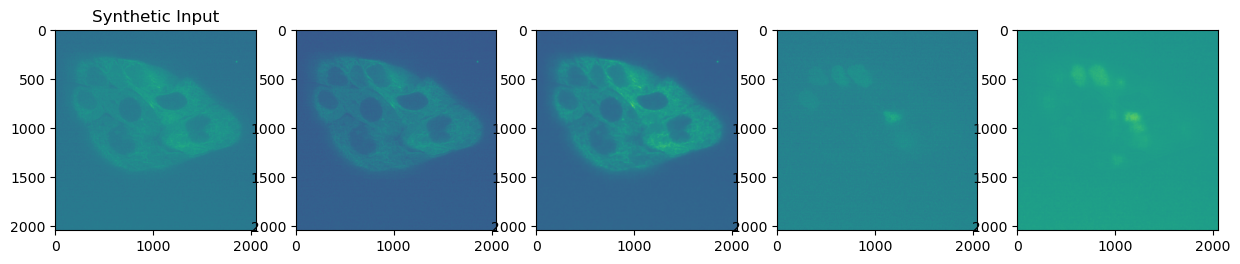

In [28]:
import matplotlib.pyplot as plt
import numpy as np
def get_input(gt):
    synthetic_input = None
    if gt.shape[-1] == 2:
        inp = (gt[...,0] + gt[...,1])/2
        synthetic_input = True
    else:
        assert gt.shape[-1] == 3
        inp = gt[...,-1]
        synthetic_input = False
    return inp, synthetic_input


key = keys[-1]
print(key)
gt, pred = gt_pred_dict[key]
gt = gt.squeeze()
pred = pred.squeeze()
_,ax = plt.subplots(figsize=(15,3),ncols=5)
inp, is_syhthetic = get_input(gt)
if is_syhthetic:
    ax[0].set_title('Synthetic Input')
else:
    ax[0].set_title('Real Input')

ax[0].imshow(inp)
ax[1].imshow(gt[...,0])
ax[2].imshow(pred[...,0])

ax[3].imshow(gt[...,1])
ax[4].imshow(pred[...,1])

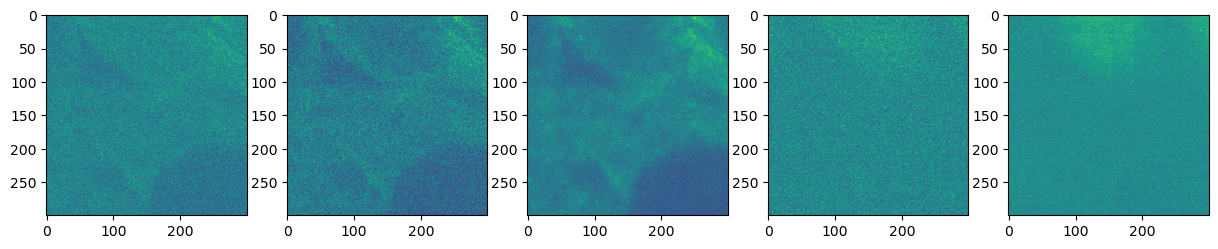

In [29]:
_,ax = plt.subplots(figsize=(15,3),ncols=5)
hs = 500
ws = 500
sz = 300
ax[0].imshow(inp[hs:hs+sz, ws:ws+sz])
ax[1].imshow(gt[hs:hs+sz, ws:ws+sz,0])
ax[2].imshow(pred[hs:hs+sz, ws:ws+sz,0])

ax[3].imshow(gt[hs:hs+sz, ws:ws+sz,1])
ax[4].imshow(pred[hs:hs+sz, ws:ws+sz,1])

In [30]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

# 5x10 grid for the input. 2x10 grid for the two targets and predictions.


# def get_cropped_img(inp, hfac, hs=None, ws= None, wN=None):
#     if wN is None:
#         wN = inp.shape[1]
    
#     if ws is None:
#         ws = (inp.shape[1] - wN)//2
#     else:
#         assert ws + wN < inp.shape[1], f'Invalid ws for the input. ws = {ws}, wN = {wN}, inp.shape = {inp.shape}'
    
#     hN = int(wN*hfac)
#     if hs is None:
#         hs = (inp.shape[0] - hN)//2
#     else:
#         assert hs + hN < inp.shape[0], f'Invalid hs for the input. hs = {hs}, hN = {hN}, inp.shape = {inp.shape}'
#     return inp[hs:hs+hN, ws:ws+wN], (hs, ws, hN, wN)

def get_cropped_img(inp, hfac, hs=None, ws= None, wN=None, extra_h=0, extra_w=0):
    if wN is None:
        wN = inp.shape[1]
    
    if ws is None:
        ws = (inp.shape[1] - wN)//2
    else:
        assert ws + wN < inp.shape[1], f'Invalid ws for the input. ws = {ws}, wN = {wN}, inp.shape = {inp.shape}'
    
    hN = int(wN*hfac)
    if hs is None:
        hs = (inp.shape[0] - hN)//2
    else:
        assert hs + hN < inp.shape[0], f'Invalid hs for the input. hs = {hs}, hN = {hN}, inp.shape = {inp.shape}'
    return inp[hs-extra_h//2:hs+hN+extra_h//2, ws - extra_w//2:ws+wN+extra_w//2], (hs-extra_h//2, ws-extra_w//2, hN+extra_h//2, wN+extra_w//2)

# key = keys[-1]
# input_h_factor = 0.5 # we want to make rectangula
# channel_h_factor = 0.48
# unit_size = 6
# ncols = 3
# nrows = 1
# grid_factor = 50
# wN = 1500
# ws = 1500

# fig = plt.figure(figsize=(ncols*unit_size,int(nrows*unit_size*input_h_factor)))

# gs = gridspec.GridSpec(int(nrows*grid_factor), ncols*grid_factor, figure=fig, wspace=0.0, hspace=0.0)

# gt, pred = gt_pred_dict[key]
# gt = gt.squeeze()
# pred = pred.squeeze()
# inp = get_input(gt)[0]

# channel_g_rows = int(grid_factor*channel_h_factor)
# channel_g_cols = grid_factor

# # input 
# col_s = 0
# col_e = grid_factor
# row_s = 0
# row_e = int(grid_factor)

# ax_inp = fig.add_subplot(gs[row_s:row_e, col_s:col_e])
# inp_crop, input_coordinates = get_cropped_img(inp, input_h_factor, wN=wN, ws=ws)
# ax_inp.imshow(inp_crop, cmap='magma')
# ax_inp.axis('off')

# # two targets
# col_s = col_e
# col_e = col_s + channel_g_cols
# row1_s = 0
# row1_e = channel_g_rows
# ax_tar1 = fig.add_subplot(gs[row1_s:row1_e, col_s:col_e])
# tar1_crop, ch_cordinates = get_cropped_img(gt[...,0], channel_h_factor*input_h_factor,  wN=wN, ws=ws)
# relative_coordinates = (ch_cordinates[0] - input_coordinates[0],
#                         ch_cordinates[1] - input_coordinates[1],
#                         ch_cordinates[2],
#                         ch_cordinates[3])
# rect = patches.Rectangle((relative_coordinates[1], relative_coordinates[0]), relative_coordinates[3],relative_coordinates[2], 
#                          linewidth=1, edgecolor='w', facecolor='none', linestyle='--')
# ax_inp.add_patch(rect)

# ax_tar1.imshow(tar1_crop, cmap='magma')
# ax_tar1.axis('off')

# row2_e = grid_factor
# row2_s = row2_e - channel_g_rows
# ax_tar2 = fig.add_subplot(gs[row2_s:row2_e, col_s:col_e])
# ax_tar2.imshow(get_cropped_img(gt[...,1], channel_h_factor*input_h_factor,  wN=wN, ws=ws)[0], cmap='magma')
# ax_tar2.axis('off')


# # two predictions
# col_s = col_e
# col_e = col_s + channel_g_cols
# ax_pred1 = fig.add_subplot(gs[row1_s:row1_e, col_s:col_e])
# ax_pred1.imshow(get_cropped_img(pred[...,0], channel_h_factor*input_h_factor,  wN=wN, ws=ws)[0], cmap='magma')
# ax_pred1.axis('off')

# ax_pred2 = fig.add_subplot(gs[row2_s:row2_e, col_s:col_e])
# ax_pred2.imshow(get_cropped_img(pred[...,1], channel_h_factor*input_h_factor,  wN=wN, ws=ws)[0], cmap='magma')
# ax_pred2.axis('off')


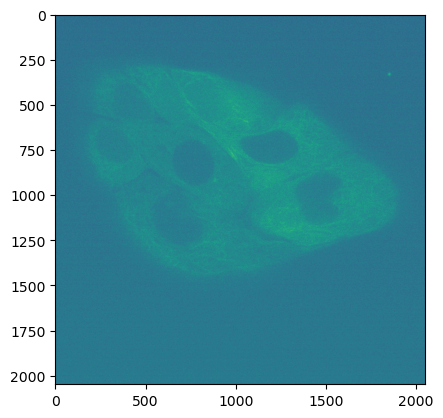

In [31]:
plt.imshow(inp)

In [32]:
inp.shape

(2048, 2048)

/group/jug/ashesh/naturemethods/two_splitting/cropped_2408_D24-M3-S0-L8_16_K0_722-837-364-363.png


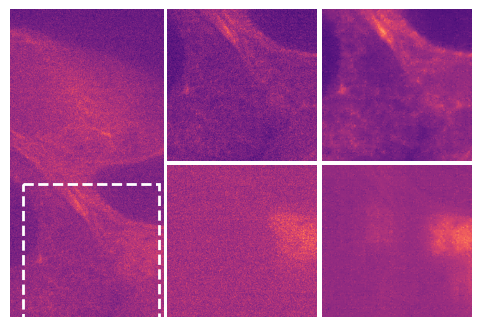

In [63]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# 5x10 grid for the input. 2x10 grid for the two targets and predictions.

key = keys[-1]
channel_h_factor = 0.495
unit_size = 2
ncols = 3
nrows = 1
grid_factor = 400
save_to_file = True

extra_h=10
extra_w=0

# this describes the left most input patch.
wN = 400
input_h_factor = 2 # we want to make rectangula
zoom_in = 1.1

if save_to_file is False:
    ws = np.random.randint(0, inp.shape[1] - wN)
    hs = np.random.randint(0, inp.shape[0] - wN*input_h_factor)

    # within the input patch, this describes the region of interest.
    ws_inset = ws + np.random.randint(0, wN - int(wN/zoom_in)) if zoom_in > 1 else ws
    hs_inset = hs + np.random.randint(0, wN*input_h_factor - int(wN*channel_h_factor/zoom_in))


fig = plt.figure(figsize=(ncols*unit_size,int(nrows*unit_size*input_h_factor)))

gs = gridspec.GridSpec(int(nrows*grid_factor), ncols*grid_factor, figure=fig, wspace=0.0, hspace=0.1)

gt, pred = gt_pred_dict[key]
gt = gt.squeeze()
pred = pred.squeeze()
inp = get_input(gt)[0]

channel_g_rows = int(grid_factor*channel_h_factor)
channel_g_cols = grid_factor

# input 
col_s = 0
col_e = grid_factor
row_s = 0
row_e = int(grid_factor)

ax_inp = fig.add_subplot(gs[row_s:row_e, col_s:col_e])
inp_crop, input_coordinates = get_cropped_img(inp, input_h_factor, wN=wN, ws=ws,hs=hs)
# print('input_coordinates', input_coordinates)
ax_inp.imshow(inp_crop, cmap='magma')
ax_inp.axis('off')

# two targets
col_s = col_e
col_e = col_s + channel_g_cols
row1_s = 0
row1_e = channel_g_rows
ax_tar1 = fig.add_subplot(gs[row1_s:row1_e, col_s:col_e])
tar1_crop, ch_cordinates = get_cropped_img(gt[...,0], channel_h_factor*input_h_factor,  wN=int(wN/zoom_in),extra_h=extra_h, extra_w=extra_w, ws=ws_inset,hs=hs_inset)
ax_tar1.imshow(tar1_crop, cmap='magma')
ax_tar1.axis('off')
relative_coordinates = (ch_cordinates[0] - input_coordinates[0],
                        ch_cordinates[1] - input_coordinates[1],
                        ch_cordinates[2],
                        ch_cordinates[3])
rect = patches.Rectangle((relative_coordinates[1]+3, relative_coordinates[0]), relative_coordinates[3]-9,relative_coordinates[2], 
                         linewidth=2, edgecolor='w', facecolor='none', linestyle='--')
ax_inp.add_patch(rect)

row2_e = grid_factor
row2_s = row2_e - channel_g_rows
ax_tar2 = fig.add_subplot(gs[row2_s:row2_e, col_s:col_e])
ax_tar2.imshow(get_cropped_img(gt[...,1], channel_h_factor*input_h_factor,  wN=int(wN/zoom_in), ws=ws_inset,hs=hs_inset,extra_h=extra_h, extra_w=extra_w)[0], cmap='magma')
ax_tar2.axis('off')


# two predictions
col_s = col_e
col_e = col_s + channel_g_cols
ax_pred1 = fig.add_subplot(gs[row1_s:row1_e, col_s:col_e])
ax_pred1.imshow(get_cropped_img(pred[...,0], channel_h_factor*input_h_factor,  wN=int(wN/zoom_in), ws=ws_inset,hs=hs_inset,extra_h=extra_h, extra_w=extra_w)[0], cmap='magma')
ax_pred1.axis('off')

ax_pred2 = fig.add_subplot(gs[row2_s:row2_e, col_s:col_e])
ax_pred2.imshow(get_cropped_img(pred[...,1], channel_h_factor*input_h_factor,  wN=int(wN/zoom_in), ws=ws_inset,hs=hs_inset, extra_h=extra_h, extra_w=extra_w)[0], cmap='magma')
ax_pred2.axis('off')

#  remove space between subplots
if save_to_file:
    # filename should contain all cropping information
    fname = 'cropped_{}_K{}_{}-{}-{}-{}.png'.format(key.replace('/','_'),KTH_SAMPLE, ch_cordinates[0], ch_cordinates[1], ch_cordinates[2], ch_cordinates[3])
    fpath = os.path.join(OUTPUT_DIR, fname)
    print(fpath)
    plt.savefig(fpath, dpi=100, bbox_inches='tight')

In [68]:
break here

SyntaxError: invalid syntax (760050616.py, line 1)

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# _, ax = plt.subplots(figsize=(9,15), ncols=3, nrows=5)
# ex_idx = ex_idx +1 #np.random.choice(range(len(data['inp'])))
# print(ex_idx)
# ax[0,0].imshow(data['inp'][ex_idx][0,0].cpu().numpy())
# ax[0,1].imshow(data['tar'][ex_idx][0,0].cpu().numpy())
# ax[0,2].imshow(data['tar'][ex_idx][0,1].cpu().numpy())

# ax[1,1].imshow(data['pred'][0][ex_idx].mean(axis=0))
# ax[1,2].imshow(data['pred'][1][ex_idx].mean(axis=0))

# ax[2,1].imshow(data['pred'][0][ex_idx][0])
# ax[2,2].imshow(data['pred'][1][ex_idx][0])
# ax[3,1].imshow(data['pred'][0][ex_idx][1])
# ax[3,2].imshow(data['pred'][1][ex_idx][1])

# ax[4,1].imshow(data['pred'][0][ex_idx][1] - data['pred'][0][ex_idx][0])
# ax[4,2].imshow(data['pred'][1][ex_idx][1] - data['pred'][1][ex_idx][0])


In [ ]:
from disentangle.core.tiff_reader import load_tiff
from skimage.io import imread
data = imread('/group/jug/ashesh/data/Dao4Channel/SIM_3color_1channel_group1.tif', plugin='tifffile')
data =data[::6].copy()

In [ ]:
plt.imshow(data[0,...,0])

In [ ]:
denoised = imread('/group/jug/ashesh/training/N2V/2405/65/SIM_3color_1channel_group1.tif', plugin='tifffile')[::6].copy()

In [ ]:
_, ax = plt.subplots(figsize=(12,6), ncols=2)
h = 1500
w = 1500
sz = 500
ax[0].imshow(data[0,h:h+sz,w:w+sz,0])
ax[1].imshow(denoised[0,h:h+sz,w:w+sz])

In [ ]:
import matplotlib.pyplot as plt
_,ax = plt.subplots(figsize=(12,3),ncols=4)
img_idx = -1
ax[0].imshow(data[img_idx,::5,::5,0])
ax[1].imshow(data[img_idx,::5,::5,1])
ax[2].imshow(data[img_idx,::5,::5,2])
ax[3].imshow(data[img_idx,::5,::5,3])

In [ ]:
plt.imshow(data[img_idx,1600:1900, 1000:1300, 2])


In [ ]:
data[...,0].mean(), data[...,1].mean(), data[...,2].mean(), data[...,3].mean()